# Houly power production, average over a month

This example will look into average hourly power potential for each month for 3 different locations

In [1]:
from FPVsimulation.simulation import FPVsimulation
from FPVsimulation.pvsystem import PVsystem
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

Initializing 3 FPV systems for three different locations with specified coordinates in Norway, south, north and one in between.

In [4]:
south_pv = PVsystem(system_area = 1,
                    latitude = 58.386973,
                    longitude = 6.585204)

mid_pv = PVsystem(system_area = 1,
                    latitude = 63.6169,
                    longitude = 10.85677)

north_pv = PVsystem(system_area = 1,
                    latitude = 71.01531,
                    longitude = 27.87619)

Retrieve system simulation data for each location

In [ ]:
south_df = south_pv.get_system_simulation_data()
mid_df = mid_pv.get_system_simulation_data()
north_df = north_pv.get_system_simulation_data()

Grouping power profile data by for montly hours

In [6]:
def monthly_hour_group(power_profile):
    power_profile.index = pd.to_datetime(power_profile.index)
    # Extract hour and month
    power_profile['hour'] = power_profile.copy().index.hour
    power_profile['month'] = power_profile.copy().index.month
    # Group by month and hour, calculate average value
    return power_profile.groupby(['month', 'hour'])


south_gr = monthly_hour_group(south_df.drop(columns='raddatabase'))
mid_gr = monthly_hour_group(mid_df.drop(columns='raddatabase'))
north_gr = monthly_hour_group(north_df.drop(columns='raddatabase'))


Get montly mean and sums for monthly hours

In [7]:
south_hourly_avg = south_gr.mean()
mid_hourly_avg = mid_gr.mean()
north_hourly_avg = north_gr.mean()

montly_aggregates_south = south_gr.sum()
montly_aggregates_mid = mid_gr.sum()
montly_aggregates_north = north_gr.sum()

Data aggragation and display

In [8]:
# Resample the data to daily frequency and calculate the daily maximum power output
daily_max_power = south_df['Power_out_W'].resample('D').max()

# Group the DataFrame by month and calculate the sum and max for energy yield and max power output
monthly_df = south_df.groupby(south_df.index.month).agg({'energy_yield_kWh': ['sum', 'max'], 
                                                                'Power_out_W': 'max'})

# Calculate the average daily peak power output for each month
monthly_df['Power_out_W','avg_daily_peak'] = daily_max_power.groupby(daily_max_power.index.month).mean()  
monthly_df = monthly_df.rename_axis('Month')
monthly_df 

energy_yield_kWh           Power_out_W               
                   sum       max         max avg_daily_peak
Month                                                      
1             0.868498  0.023885   23.885413       8.726531
2             2.598640  0.050136   50.135758      19.388587
3             8.931303  0.089246   89.246165      48.180741
4            17.036888  0.113124  113.123582      77.204280
5            21.381357  0.127204  127.204326      86.073411
6            25.996111  0.123763  123.762975      99.434990
7            21.448558  0.120773  120.773118      84.551121
8            16.652647  0.113351  113.351448      73.571189
9             8.888135  0.090624   90.623541      48.431366
10            4.585174  0.064759   64.758698      30.778558
11            1.208553  0.035670   35.669591      12.310921
12            0.494777  0.013754   13.753551       5.968557

Plot

/tmp/ipykernel_7636/2019187628.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{tick:.2f} kWh/m2' for tick in plt.gca().get_yticks()])


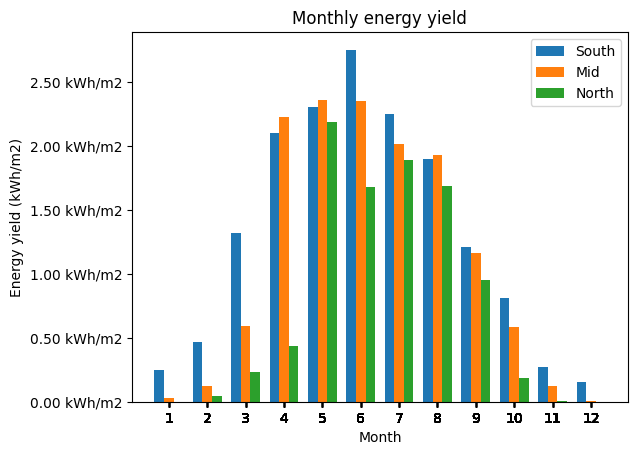

In [10]:
import matplotlib.pyplot as plt

# Set the width of the bars
bar_width = 0.25

# Create a figure and axis object
fig, ax = plt.subplots()

# Extract month component from the MultiIndex
months_south = montly_aggregates_south.index.get_level_values('month')

# Plot montly_aggregates_south
ax.bar(months_south - bar_width, montly_aggregates_south['energy_yield_kWh'], bar_width, label='South')

# Extract month component from the MultiIndex
months_mid = montly_aggregates_mid.index.get_level_values('month')

# Plot montly_aggregates_mid
ax.bar(months_mid, montly_aggregates_mid['energy_yield_kWh'], bar_width, label='Mid')

# Extract month component from the MultiIndex
months_north = montly_aggregates_north.index.get_level_values('month')

# Plot montly_aggregates_north
ax.bar(months_north + bar_width, montly_aggregates_north['energy_yield_kWh'], bar_width, label='North')

# Add labels and legend
ax.set_xlabel('Month')
ax.set_ylabel('Energy yield (kWh/m2)')
ax.set_title('Monthly energy yield')
ax.set_xticks(months_south)
ax.set_xticklabels(months_south)
ax.legend()

# Format y-axis tick labels
plt.gca().set_yticklabels([f'{tick:.2f} kWh/m2' for tick in plt.gca().get_yticks()])

# Show plot
plt.show()


/tmp/ipykernel_7636/1972017750.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{tick:.2f}' for tick in plt.gca().get_yticks()])


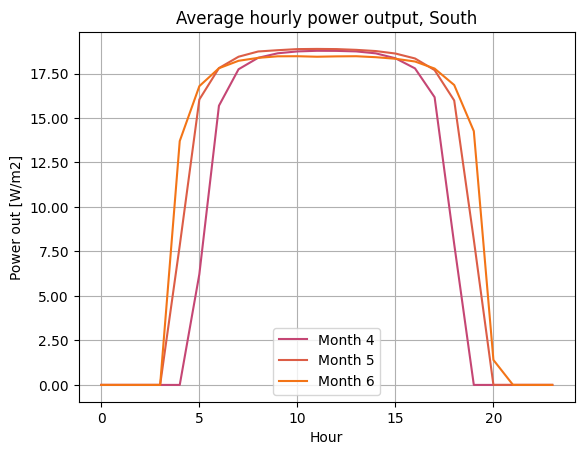

In [11]:

norm_months = np.linspace(0, 1, 12)

# Define colors for the segments
blue_purple = (0.5, 0, 1)  # Blue/Purple
orange = (1, 0.5, 0)  # Orange
blue = (0, 0, 1)  # Blue

# Create a custom colormap with a gradient between blue/purple and orange
cmap = LinearSegmentedColormap.from_list('CustomMap', [blue_purple, orange, blue], N=12)

# Plot each month separately with a different color
for month, norm_month in zip(range(1, 13), norm_months):
    month_data = south_hourly_avg.xs(month, level='month')
    if month in [4, 5,6]:
        plt.plot(month_data.index.get_level_values('hour'), 
                 month_data['module_efficiency'], 
                 label=f'Month {month}', 
                 color=cmap(norm_month))


# Add labels and legend
plt.xlabel('Hour')
plt.ylabel('Power out [W/m2]')
plt.title('Average hourly power output, South')
plt.legend()
plt.grid(True)


#plt.ylim(0,1)

plt.gca().set_yticklabels([f'{tick:.2f}' for tick in plt.gca().get_yticks()])
# Show plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

# Define colors for the segments
blue_purple = (0.5, 0, 1)  # Blue/Purple
orange = (1, 0.5, 0)  # Orange
blue = (0, 0, 1)  # Blue

# Create a custom colormap with a gradient between blue/purple and orange
cmap = LinearSegmentedColormap.from_list('CustomMap', [blue_purple, orange, blue], N=12)

# Create subplots for each month
fig, axes = plt.subplots(3, 4, figsize=(15, 10), sharex=True, sharey=True)

# Plot each month separately with a different color and axis
for month, norm_month, ax in zip(range(1, 13), np.linspace(0, 1, 12), axes.flat):
    month_data = south_hourly_avg.xs(month, level='month')
    ax.plot(month_data.index.get_level_values('hour'), month_data['IAM'], label=f'Month {month}', color=cmap(norm_month))
    
    # Add labels and legend
    ax.set_xlabel('Hour')
    ax.set_ylabel('Power out [W/m2]')
    ax.set_title(f'Month {month}')
    ax.grid(True)
    ax.set_ylim(0, 1)
    ax.set_yticklabels([f'{tick:.0f} W' for tick in ax.get_yticks()])

# Adjust layout and show plot
plt.tight_layout()
plt.show()


/tmp/ipykernel_7636/939777967.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{tick:.0f} W' for tick in plt.gca().get_yticks()])


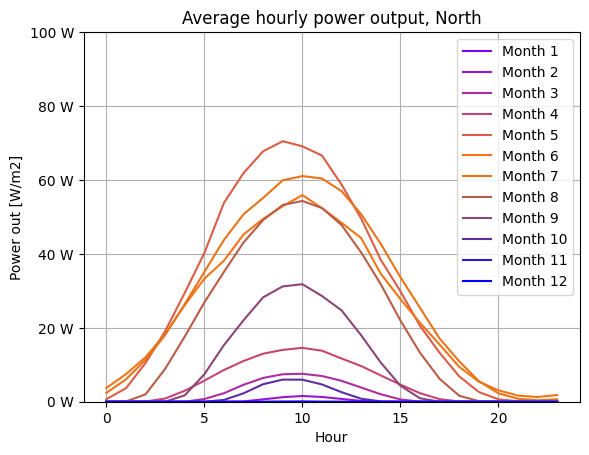

In [13]:

norm_months = np.linspace(0, 1, 12)

# Define colors for the segments
blue_purple = (0.5, 0, 1)  # Blue/Purple
orange = (1, 0.5, 0)  # Orange
blue = (0, 0, 1)  # Blue

# Create a custom colormap with a gradient between blue/purple and orange
cmap = LinearSegmentedColormap.from_list('CustomMap', [blue_purple, orange, blue], N=12)

# Plot each month separately with a different color
for month, norm_month in zip(range(1, 13), norm_months):
    month_data = north_hourly_avg.xs(month, level='month')
    plt.plot(month_data.index.get_level_values('hour'), month_data['Power_out_W/m2'], label=f'Month {month}', color=cmap(norm_month))

# Add labels and legend
plt.xlabel('Hour')
plt.ylabel('Power out [W/m2]')
plt.title('Average hourly power output, North')
plt.legend()
plt.grid(True)
plt.ylim(0,100)


plt.gca().set_yticklabels([f'{tick:.0f} W' for tick in plt.gca().get_yticks()])
# Show plot
plt.show()

In [14]:
south_eff_profile_df = south_df.get_efficiency_profile()


south_eff_profile = average_hourly_values(south_eff_profile_df)

AttributeError: 'DataFrame' object has no attribute 'get_efficiency_profile'

In [ ]:
south_eff_profile_df['hour'] = south_eff_profile_df.index.hour
south_eff_profile_df['month'] = south_eff_profile_df.index.month

In [ ]:
gpoa = south_df.get_G_POA_profile()
gpoa

,poa_global_W/m2,T2m,WS10m,aoi
time(UTC),,,,
2017-01-01 00:00:00,0.0,3.58,3.42,144.376049
2017-01-01 01:00:00,0.0,3.49,3.53,141.630312
2017-01-01 02:00:00,0.0,3.39,3.65,136.423089
2017-01-01 03:00:00,0.0,3.29,3.76,129.657175
2017-01-01 04:00:00,0.0,3.19,3.87,122.081157
...,...,...,...,...
2019-12-31 19:00:00,0.0,4.07,2.86,120.354941
2019-12-31 20:00:00,0.0,3.97,2.97,128.030664
2019-12-31 21:00:00,0.0,3.88,3.09,135.039011


In [ ]:
south_eff_profile_df['module_efficiency']*gpoa['aoi']

time(UTC)
2017-01-01 00:00:00    0.0
2017-01-01 01:00:00    0.0
2017-01-01 02:00:00    0.0
2017-01-01 03:00:00    0.0
2017-01-01 04:00:00    0.0
                      ... 
2019-12-31 19:00:00    0.0
2019-12-31 20:00:00    0.0
2019-12-31 21:00:00    0.0
2019-12-31 22:00:00    0.0
2019-12-31 23:00:00    0.0
Length: 8760, dtype: float64

In [ ]:
south_eff_profile = average_hourly_values(south_df.get_efficiency_profile())
mid_eff_profile = average_hourly_values(mid_df.get_efficiency_profile())
north_eff_profile = average_hourly_values(north_df.get_efficiency_profile())


/tmp/ipykernel_8345/4007591725.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{tick:.0f} %' for tick in plt.gca().get_yticks()])


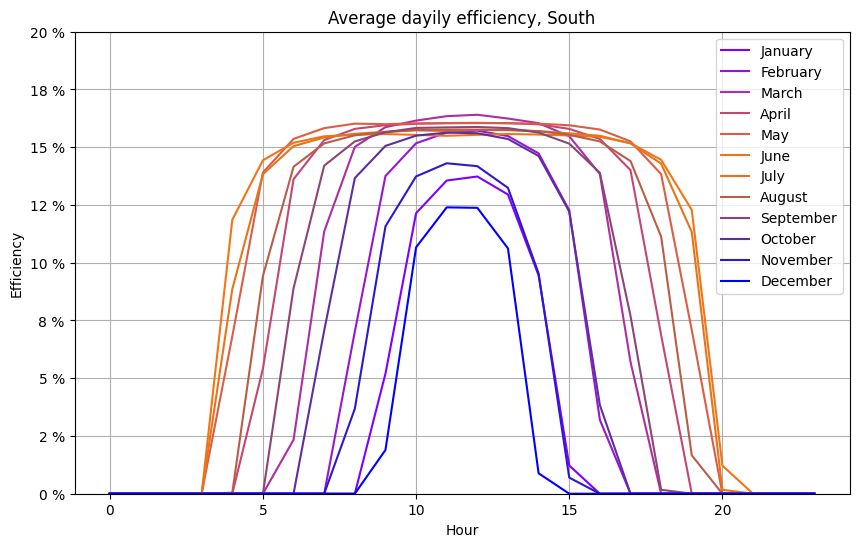

In [ ]:


import calendar

plt.figure(figsize=(10, 6))  # Width: 10 inches, Height: 6 inches

# Plot each month separately with a different color
for month, norm_month in zip(range(1, 13), norm_months):
    month_data = south_eff_profile.xs(month, level='month')
    plt.plot(month_data.index.get_level_values('hour'), month_data['module_efficiency'], label=calendar.month_name[month], color=cmap(norm_month))

# Add labels and legend
plt.xlabel('Hour')
plt.ylabel('Efficiency')
plt.title('Average dayily efficiency, South')
plt.legend()
plt.grid(True)
plt.ylim(0,20)


plt.gca().set_yticklabels([f'{tick:.0f} %' for tick in plt.gca().get_yticks()])
# Show plot
plt.show()

/tmp/ipykernel_8345/1387348780.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{tick:.0f} %' for tick in plt.gca().get_yticks()])


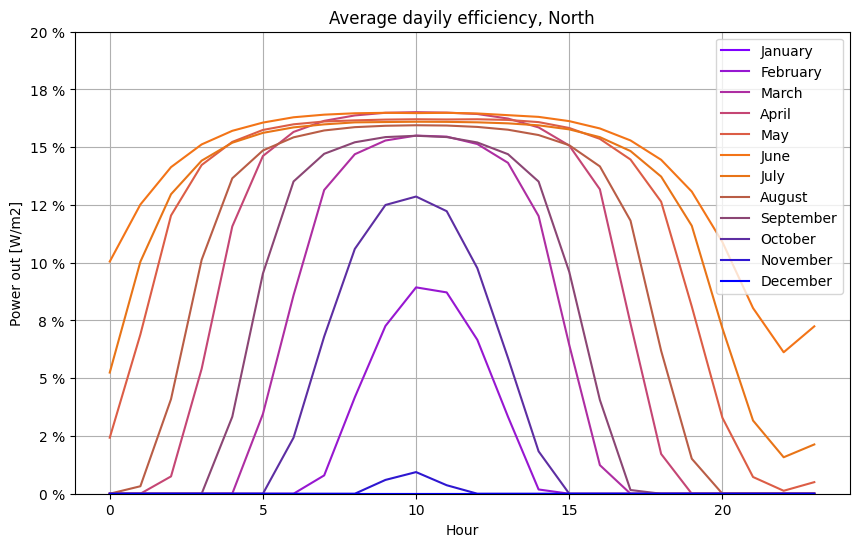

In [ ]:
plt.figure(figsize=(10, 6))  # Width: 10 inches, Height: 6 inches

# Plot each month separately with a different color
for month, norm_month in zip(range(1, 13), norm_months):
    month_data = north_eff_profile.xs(month, level='month')
    plt.plot(month_data.index.get_level_values('hour'), month_data['module_efficiency'], label=calendar.month_name[month], color=cmap(norm_month))

# Add labels and legend
plt.xlabel('Hour')
plt.ylabel('Power out [W/m2]')
plt.title('Average dayily efficiency, North')
plt.legend()
plt.grid(True)
plt.ylim(0,20)


plt.gca().set_yticklabels([f'{tick:.0f} %' for tick in plt.gca().get_yticks()])
# Show plot
plt.show()